# Logistic Regression
#### It's a classification algorithm which is usually confused with regression predictive models

## With Numpy

In [0]:
# importing required dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

In [61]:
# upload data from your local hdd/ssd
from google.colab import files
uploaded = files.upload()

Saving ex2data1.txt to ex2data1.txt


In [62]:
%mv ex2data1.txt logistic.txt
%ls

logistic.txt  sample_data/


In [63]:
# defining the data frame
df = pd.read_csv("logistic.txt", sep=",", header=None)
df.columns = ['x1', 'x2', 'y']
df.head(10)

,x1,x2,y
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1
5,45.083277,56.316372,0
6,61.106665,96.511426,1
7,75.024746,46.554014,1
8,76.098787,87.420570,1
9,84.432820,43.533393,1


In [64]:
# defining the inputs and outputs 
x = pd.DataFrame(df[['x1', 'x2']])
Y = pd.DataFrame(df['y'])

print("The input looks like this\n{}".format(x.head(10)))
print("\nOutput looks like this\n{}".format(Y.head(10)))

# converting X and Y into numpy arrays
X = np.array(x)
Y = np.array(Y)

# Set the number of features and training examples
m = X.shape[0]
n = X.shape[1]

The input looks like this
          x1         x2
0  34.623660  78.024693
1  30.286711  43.894998
2  35.847409  72.902198
3  60.182599  86.308552
4  79.032736  75.344376
5  45.083277  56.316372
6  61.106665  96.511426
7  75.024746  46.554014
8  76.098787  87.420570
9  84.432820  43.533393

Output looks like this
   y
0  0
1  0
2  0
3  1
4  1
5  0
6  1
7  1
8  1
9  1


In [65]:
# normalize the data
def normalize_data(data):
    
    return (data - data.mean()) / (data.max() - data.min())

X = normalize_data(X)

print("After normalizing the input looks like this\n{}".format(X[:10]))
print("\nNo normalization applied to Y since it's the prediction\n")

After normalizing the input looks like this
[[-0.44875891  0.17330835]
 [-0.51092043 -0.31587277]
 [-0.43121891  0.09988761]
 [-0.08242248  0.29204096]
 [ 0.18775664  0.13489136]
 [-0.29884115 -0.13783714]
 [-0.06917785  0.43827881]
 [ 0.13031009 -0.27776108]
 [ 0.14570433  0.30797951]
 [ 0.26515608 -0.32105565]]

No normalization applied to Y since it's the prediction



In [0]:
# Set the number of iterations, alpha and weights
iter = 100000
alpha = 0.003
theta = np.zeros((n,Y.shape[1]))

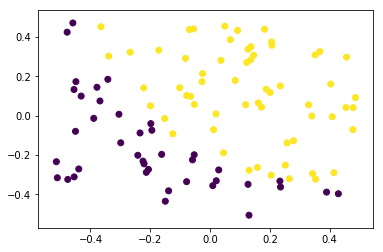

In [67]:
# Visualizing data
def visualize_data(x, y, z):
    
    plt.scatter(x, y, marker = 'o', c=z)
    plt.show()
    
visualize_data(X[:,0], X[:,1], np.squeeze(Y, axis = -1))

In [0]:
# defining sigmoid function
def sigmoid(z):
    return 1./(1+np.exp(-z))

In [0]:
# Cost function
def cost(theta,X,y):
    
    hyp = sigmoid(np.dot(X,theta))
    
    positive = np.multiply(y, np.log(hyp))
    negative = np.multiply((1-y), np.log(1-hyp))

    return (-1./m)*np.sum(positive+negative)

In [0]:
# Gradient descent function
def gradDescent(theta,X,y):
    
    costs = list()

    for i in range(iter):

        hyp = sigmoid(X.dot(theta))

        gradient = (X.T.dot(hyp-y))
        theta = theta - (alpha/m)*gradient

        costs.append(cost(theta,X,y))

    return theta,costs

theta,costs = gradDescent(theta,X,Y)

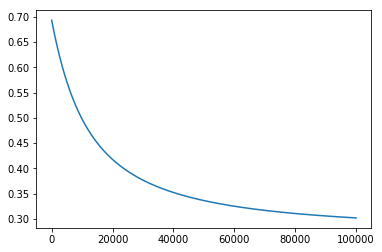

In [71]:
# Visualize the cost
def visualize_cost():
    
    y_axis = np.array(costs)
    x_axis = np.array([i for i in range(iter)])
    plt.plot(x_axis,y_axis)
    plt.show()

visualize_cost()

In [72]:
# function to check decision
def decision(prob):
    if(prob >= 0.5):
        return 1
    else:
        return 0

print("Theta values obtained after descent are\n{}".format(theta))

# sample input
X = np.array([1,-0.7])

# prediction = weight*input
hyp = sigmoid(X.dot(theta))
print("\nThe predicted value is:", decision(float(hyp)))

Theta values obtained after descent are
[[6.46230471]
 [5.98904162]]

The predicted value is: 1


## With Scikit Learn

In [80]:
# import the needed libraries
from sklearn.linear_model import LogisticRegression

# convert to pandas dataframe
X = normalize_data(pd.DataFrame(x))
Y = pd.DataFrame(Y)

# define the train and test set
x_train = X[:60]
y_train = Y[:60]

x_test = X[60:]
y_test = Y[60:]

print("Train input\n{}".format(x_train.head()))
print("\nTrain output\n{}".format(y_train.head()))

print("\nTest input\n{}".format(x_test.head()))
print("\nTest output\n{}".format(y_test.head()))

split = (len(X)-len(x_test))/(len(X))

print("\nTrain-Test split is {}".format(split))

Train input
         x1        x2
0 -0.444619  0.172892
1 -0.506780 -0.327058
2 -0.427079  0.097855
3 -0.078282  0.294239
4  0.191897  0.133630

Train output
   0
0  0
1  0
2  0
3  1
4  1

Test input
          x1        x2
60  0.139766  0.286202
61 -0.435124 -0.281274
62 -0.134593 -0.394932
63 -0.510046 -0.243591
64 -0.300649  0.003341

Test output
    0
60  1
61  0
62  0
63  0
64  0

Train-Test split is 0.6


In [82]:
# define the model
logistic = LogisticRegression(solver='lbfgs')

# train the model
logistic.fit(x_train, y_train.squeeze())
print("{}% accuracy".format(logistic.score(x_train, y_train)*100))

#Equation coefficient and Intercept
print('\nCoefficient:', logistic.coef_)
print('\nIntercept:', logistic.intercept_)

#Predict Output
predicted = logistic.predict(x_test)
print("\nPrediction : {}".format(predicted))

91.66666666666666% accuracy

Coefficient: [[2.62097928 1.87766313]]

Intercept: [0.21115759]

Prediction : [1 0 0 0 0 0 1 0 1 1 0 1 1 1 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1 0 1 1 0 1 1 1 0
 1 0 1]
